# Introduction to KNN Algorithm

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. One of the biggest advantages of K-NN is that it is a lazy-learner. This means the model requires no training, and can get right to classifying data, unlike its other ML siblings such as SVM, regression, and multi-layer perceptions.

The KNN classifier is also a non parametric and instance-based learning algorithm.
Non-parametric means it makes no explicit assumptions about the functional form of h, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.
Instance-based learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.

### Theory

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

<img src="Images\knn-algorithm-python-scikit-learn-1.png.png" width="800" />

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

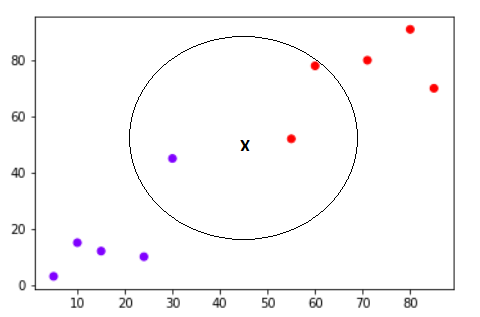

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

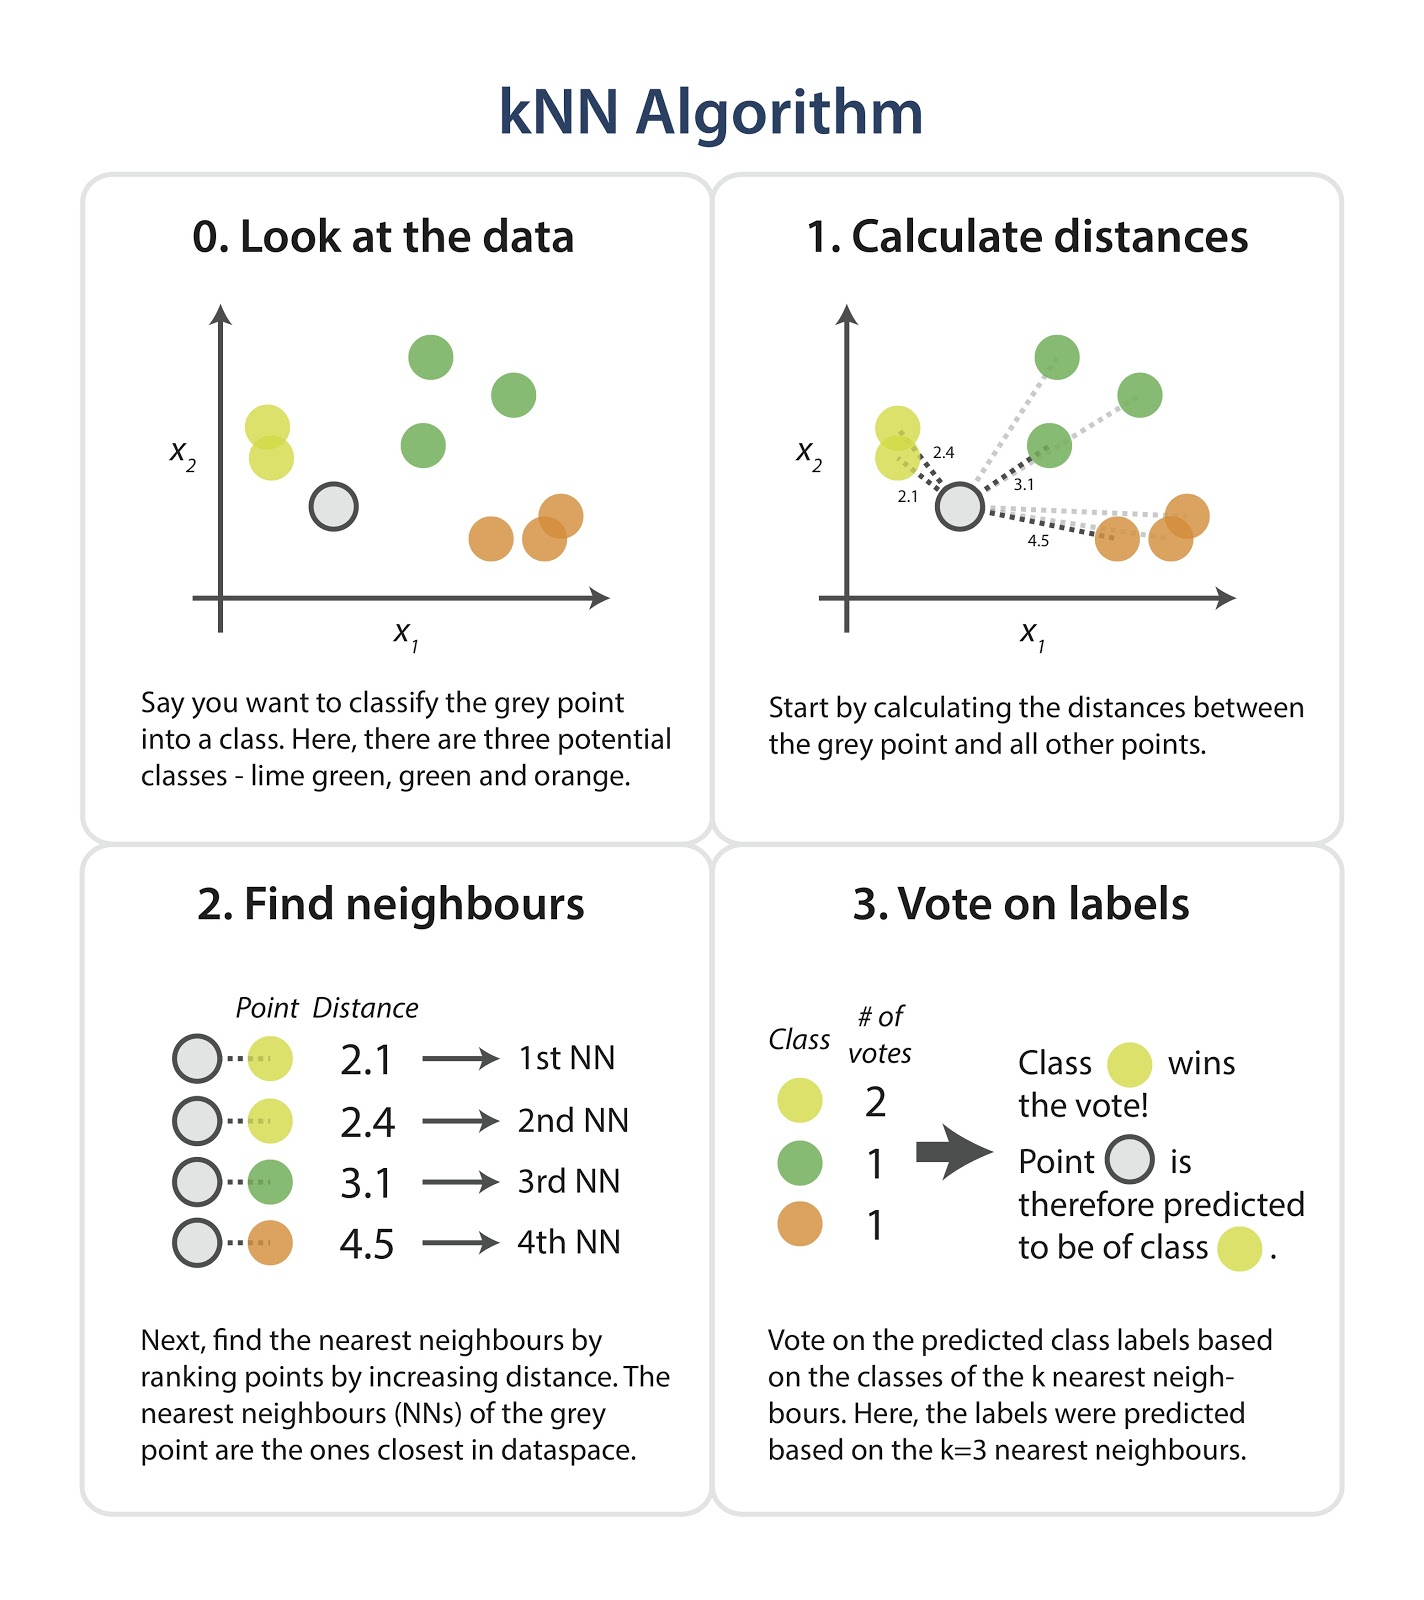

### Pros:
It is extremely easy to implement, As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
Since the algorithm requires no training before making predictions, new data can be added seamlessly.
There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

### Cons:
The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [21]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from ggplot import *

plt.rcParams['figure.figsize'] = (16, 6)

In [22]:
from sklearn import neighbors, datasets

iris = datasets.load_iris() # import iris dataset
X = iris.data # 4 features 
Y = iris.target # target class

print("iris dataset 4 features: sepal-width, sepal-length, petal-width and petal-length")
print(X[1:5,])
print("\niris dataset target class: setosa, versicolor and virginica")
print(np.unique(Y))
print(iris.target_names)

iris dataset 4 features: sepal-width, sepal-length, petal-width and petal-length
[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

iris dataset target class: setosa, versicolor and virginica
[0 1 2]
['setosa' 'versicolor' 'virginica']


We are going to use the famous iris data set for our KNN example. The dataset consists of four features: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: setosa, versicolor and virginica.

Next, let's visualize the data before rushing into classification so that we can have a deeper understanding of the problem at hand. Let's create 2 quick scatter plots of sepal width vs sepal length and petal width vs petal length.

In [23]:
names = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
iris_df = pd.DataFrame(data=X, index=None, columns=names)
iris_df['class'] = Y
iris_df['species'] = Y
iris_df['species'].replace(to_replace=0, value='setosa', inplace=True)
iris_df['species'].replace(to_replace=1, value='versicolor', inplace=True)
iris_df['species'].replace(to_replace=2, value='virginica', inplace=True)
iris_df.head()

,sepal_width,sepal_length,petal_width,petal_length,class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


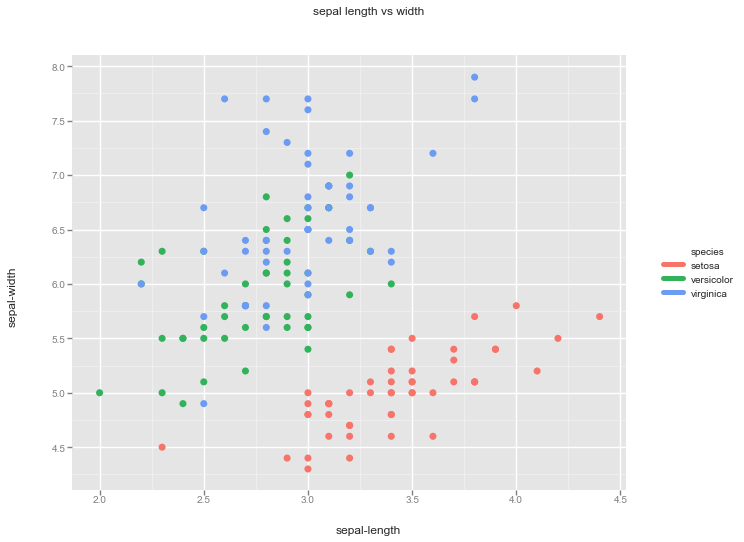

<ggplot: (15432575)>

In [24]:
ggplot(iris_df, aes(x='sepal_length', y='sepal_width', color='species')) + geom_point(size=50) +\
    xlab("sepal-length") + ylab("sepal-width") + ggtitle("sepal length vs width")

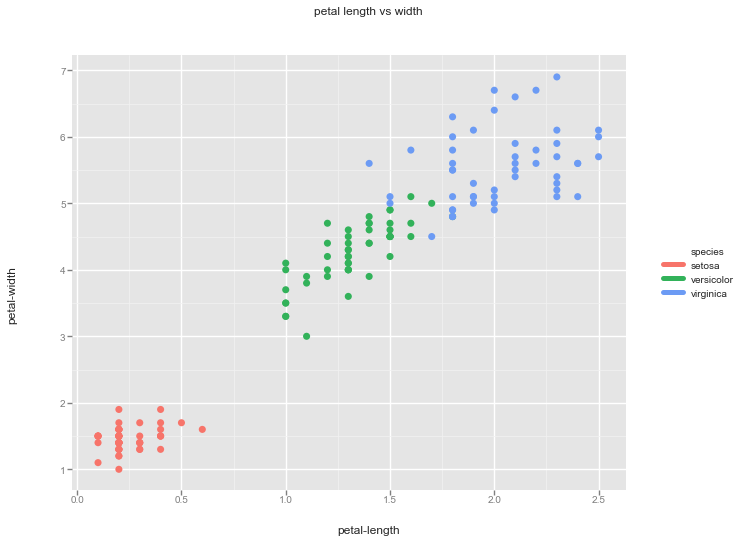

<ggplot: (15809358)>

In [25]:
ggplot(iris_df, aes(x='petal_length', y='petal_width', color='species')) + geom_point(size=50) +\
    xlab("petal-length") + ylab("petal-width") + ggtitle("petal length vs width")

A quick study of the above graphs reveals some strong classification criterion. We observe that setosas have small petals, versicolor have medium sized petals and virginica have the largest petals. Furthermore, setosas seem to have shorter and wider sepals than the other two classes. Pretty interesting right? Without even using an algorithm, we’ve managed to intuitively construct a classifier that can perform pretty well on the dataset.

We’ll be using scikit-learn to train a KNN classifier and evaluate its performance on the data set. But, for this we need we need to split our data into training and test sets. Firstly, we will run the KNN algorithm with 3 neighbours i.e. K=3 and let's see the accuracy of model. Also, let's compare the original and predicted class and visualize the same to get better understading.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print ("Accuracy Score with K=3: ", accuracy_score(Y_test, pred))

# compare values and their frequency of original and predicted class
unique, counts = np.unique(Y_test, return_counts=True)
print ("Original  iris class unique values & frequency: ", dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print ("Predicted iris class unique values & frequency: ", dict(zip(unique, counts)))

Accuracy Score with K=3:  0.955555555556
Original  iris class unique values & frequency:  {0: 14, 1: 17, 2: 14}
Predicted iris class unique values & frequency:  {0: 14, 1: 15, 2: 16}


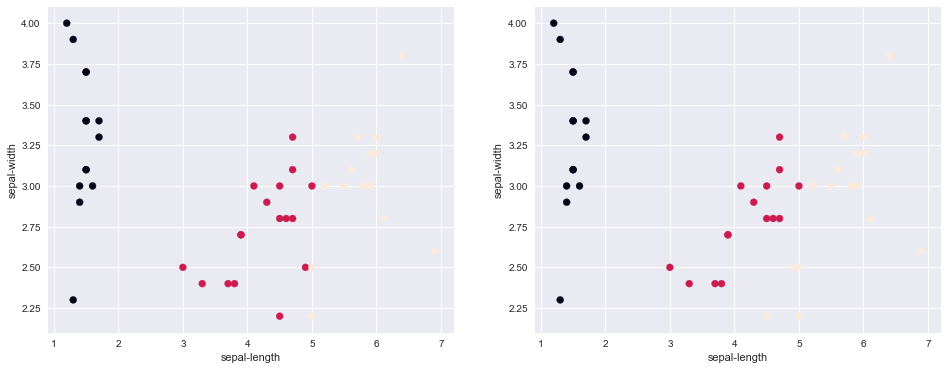

In [35]:
# scatter plot of test dataset with class
plt.subplot(1,2,1)
plt.scatter(x=X_test[:,2], y=X_test[:,1], c=Y_test)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

# scatter plot of test dataset with predicted class
plt.subplot(1,2,2)
plt.scatter(x=X_test[:,2], y=X_test[:,1], c=pred)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width');

In this section, we’ll explore a method that can be used to tune the hyperparameter K.
Obviously, the best K is the one that corresponds to the lowest test error rate, so let’s suppose we carry out repeated measurements of the test error for different values of K.
A smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.
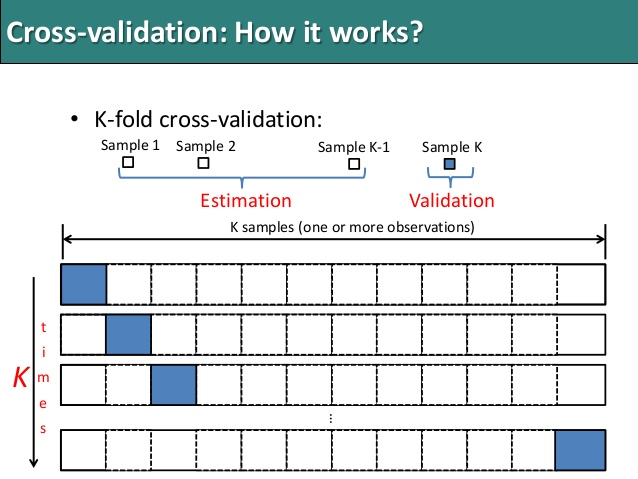
As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out. Let's take a example below to understand how cross validation works on training dataset

In [29]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
neighbors = list(range(2,20))

# empty list that will hold cv scores and accuracies
cv_scores = []
accuracies = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    accuracies.append(accuracy_score(Y_test, pred))

The optimal number of neighbors is 8


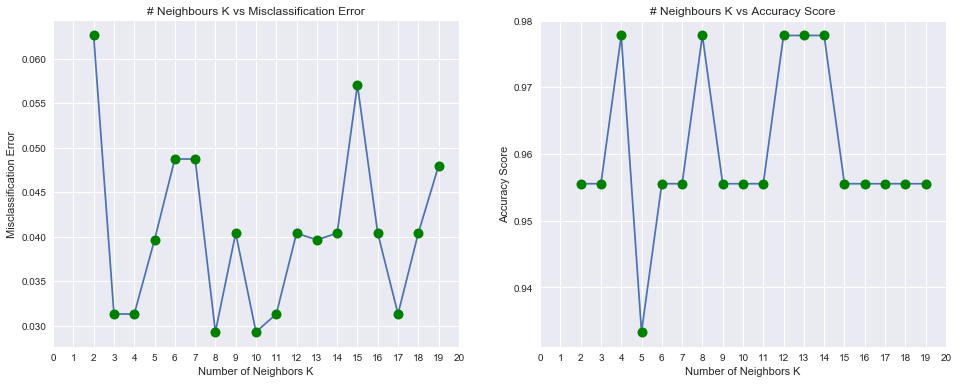

In [31]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k neighbours
plt.subplot(1,2,1)
plt.plot(neighbors, MSE, marker='o', markerfacecolor='green', markersize=10)
plt.xticks(np.arange(0, 21))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('# Neighbours K vs Misclassification Error')

# plot accuracy score vs k neighbours
plt.subplot(1,2,2)
plt.plot(neighbors, accuracies, marker='o', markerfacecolor='green', markersize=10)
plt.xticks(np.arange(0, 21))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.title('# Neighbours K vs Accuracy Score');

10-fold cross validation tells us that K=8 results in the lowest validation error and we can see the correlation in accuracy score were K=8 has highest accuracy score. Let's predict class with K=8 and compare the original & predicted class

In [32]:
# instantiate learning model (k = 8)
knn = KNeighborsClassifier(n_neighbors=8)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print ("Accuracy Score with K=3: ", accuracy_score(Y_test, pred))
unique, counts = np.unique(Y_test, return_counts=True)
print ("Original  iris class unique values & frequency: ", dict(zip(unique, counts)))
unique, counts = np.unique(pred, return_counts=True)
print ("Predicted iris class unique values & frequency: ", dict(zip(unique, counts)))

Accuracy Score with K=3:  0.977777777778
Original  iris class unique values & frequency:  {0: 14, 1: 17, 2: 14}
Predicted iris class unique values & frequency:  {0: 14, 1: 16, 2: 15}


Let's do another example using data from the Breast Cancer Wisconsin dataset. The dataset consists of ten real-valued features obtained from images of fine needle aspirate of breast mass. The breast cancer data includes 569 cases of cancer biopsies, each with 30 features that are numeric-valued laboratory measurements. The diagnosis is coded as “B” to indicate benignor “M” to indicate malignant. For more information, you can load the data and then run DESCR fucntion (cancer.DESCR)

In [38]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() #load the breast cancer dataset
print('Size of Breast Cancer dataset: ', cancer.data.shape)
print('\nBreast Cancer Features: ', cancer.feature_names)
print('\nBreast Cancer Target Response: ', cancer.target_names)

Size of Breast Cancer dataset:  (569, 30)

Breast Cancer Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Breast Cancer Target Response:  ['malignant' 'benign']


Assunming that dataset is good and we will directly apply the KNN algorithm after we split the dataset into train and test dataset. We will use a slight different approach this time. We will split the dataset using stratify feature. 

Stratified Random Sampling - In statistics, stratified sampling is a method of sampling from a population. Stratification is the process of dividing members of the population into homogeneous subgroups before sampling. The strata should be mutually exclusive: every element in the population must be assigned to only one stratum. Assume that we need to estimate average number of votes for each candidate in an election. Assume that country has 3 towns: Town A has 1 million factory workers, Town B has 2 million office workers and Town C has 3 million retirees. We can choose to get a random sample of size 60 over the entire population but there is some chance that the random sample turns out to be not well balanced across these towns and hence is biased causing a significant error in estimation. Instead if we choose to take a random sample of 10, 20 and 30 from Town A, B and C respectively then we can produce a smaller error in estimation for the same total size of sample.

For Accuracy, we will compare both train and test accuracy and identify the best K neighbours metric.

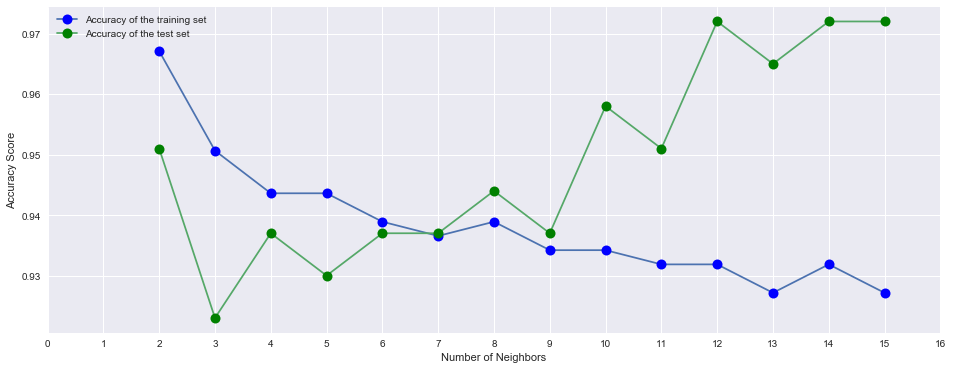

In [44]:
# stratified spilt the datset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=50)

train_accuracy = []
test_accuracy = []

# try KNN for diffrent k nearest neighbor from 1 to 15
neighbors = range(2,16)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors, train_accuracy, label='Accuracy of the training set', marker='o', markerfacecolor='blue', markersize=10)
plt.plot(neighbors, test_accuracy, label='Accuracy of the test set', marker='o', markerfacecolor='green', markersize=10)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Neighbors')
plt.xticks(np.arange(0, 17))
plt.legend();

From the plot we can observe that K=7 is the best for both training and test dataset. So, let's predict the values and compare against original class

In [47]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
train_accuracy.append(knn.score(X_train, y_train))
test_accuracy.append(knn.score(X_test, y_test))

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print ("Train dataset Accuracy Score with K=7: ", knn.score(X_train, y_train))
print ("Test dataset Accuracy Score with K=7 : ", knn.score(X_test, y_test))

unique, counts = np.unique(y_test, return_counts=True)
print ("Original Breast Diagnosis class unique values & frequency : ", dict(zip(unique, counts)))

unique, counts = np.unique(pred, return_counts=True)
print ("Predicted Breast Diagnosis class unique values & frequency: ", dict(zip(unique, counts)))

Train dataset Accuracy Score with K=7:  0.93661971831
Test dataset Accuracy Score with K=7 :  0.937062937063
Original Breast Diagnosis class unique values & frequency :  {0: 53, 1: 90}
Predicted Breast Diagnosis class unique values & frequency:  {0: 44, 1: 99}
